In [1]:
#!pip install pandas
#!pip install scikit-learn
#!pip install tensorflow

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

2024-04-28 01:01:56.858514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 01:01:56.962604: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 01:01:56.966772: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-28 01:01:56.966784: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
data = pd.read_csv('sim_data_vasko - rab - sim_data.csv')

In [3]:
data = data[data['total'] != 0]

In [4]:
data.columns


Index(['ind', 'sex', 'age_sim', 'lv_educ', 'empl_stat', 'marit_stat',
       'house_memb', 'chil_u_18_y', 'nation', 'religion', 'soc_econ_stat',
       'prof_ind', 'prof_stat', 'count_house', 'own_field', 'num_car_house',
       'own_rent_house', 'edu', 'temperam', 'ind_risk_sim', 'invest_exp_sim',
       'shares', 'corp_oblig', 'oth', 'inv_fund', 'cash', 'crypto', 'gov_bond',
       'deposits', 'income_sim', 'pers_exp_sim', 'house_exp_sim', 'taxes_sim',
       'transp_telecom_sim', 'hobby_sim', 'banking', 'bk_oprat', 'bk_dc',
       'bk_cc', 'bk_acc', 'ins_prop', 'ins_life', 'ins_casco', 'health_ins',
       'overdraft', 'cons_cred', 'mortgage', 'car_leas', 'pens_ins', '.',
       'lv_educ.1', 'empl_stat.1', 'marit_stat.1', 'house_memb.1',
       'chil_u_18_y.1', 'nation.1', 'religion.1', 'soc_econ_stat.1',
       'prof_ind.1', 'prof_stat.1', 'count_house.1', 'own_field.1',
       'num_car_house.1', 'own_rent_house.1', 'edu.1', 'temperam.1',
       'ind_risk_sim.1', 'invest_exp_sim.1'

In [5]:
data = data.drop(['.',
       'lv_educ.1', 'empl_stat.1', 'marit_stat.1', 'house_memb.1',
       'chil_u_18_y.1', 'nation.1', 'religion.1', 'soc_econ_stat.1',
       'prof_ind.1', 'prof_stat.1', 'count_house.1', 'own_field.1',
       'num_car_house.1', 'own_rent_house.1', 'edu.1', 'temperam.1',
       'ind_risk_sim.1', 'invest_exp_sim.1', 'shares.1', 'corp_oblig.1',
       'oth.1', 'inv_fund.1', 'cash.1', 'crypto.1', 'gov_bond.1', 'deposits.1',
       'income_sim.1', 'pers_exp_sim.1', 'house_exp_sim.1', 'taxes_sim.1',
       'transp_telecom_sim.1', 'hobby_sim.1', 'banking.1', 'bk_oprat.1',
       'bk_dc.1', 'bk_cc.1', 'bk_acc.1', 'ins_prop.1', 'ins_life.1',
       'ins_casco.1', 'health_ins.1', 'overdraft.1', 'cons_cred.1',
       'mortgage.1', 'car_leas.1', 'pens_ins.1','total','Unnamed: 96','ind']
, axis=1)

In [6]:
# List of columns that are NOT supposed to be integers
non_integer_columns = ['ind_risk_sim']  # list column names

In [7]:
#label_encoders = {}
#for column in data.columns:
#    if data[column].dtype == 'object':  # For categorical columns
#        le = LabelEncoder()
#        data[column] = le.fit_transform(data[column])
#        label_encoders[column] = le

In [8]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# Save the minimum and maximum values
min_values = scaler.data_min_
max_values = scaler.data_max_

# Convert the scaled data back to a DataFrame (optional)
# This step is useful if you want to keep the DataFrame format
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [9]:
scaled_data.head()

,sex,age_sim,lv_educ,empl_stat,marit_stat,house_memb,chil_u_18_y,nation,religion,soc_econ_stat,...,bk_acc,ins_prop,ins_life,ins_casco,health_ins,overdraft,cons_cred,mortgage,car_leas,pens_ins
0,1.0,0.549020,0.5,0.75,0.666667,0.166667,0.000000,0.0,0.333333,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.823529,0.0,0.50,1.000000,0.500000,0.000000,0.0,0.333333,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.313725,0.5,0.50,0.333333,0.500000,0.000000,0.0,0.333333,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.588235,0.0,0.75,0.333333,0.500000,0.000000,0.0,0.500000,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.313725,0.5,0.50,1.000000,1.000000,0.666667,0.0,0.333333,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def build_generator(seed_size, features):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=seed_size),
        layers.Dense(256, activation='relu'),
        layers.Dense(features, activation='linear')  # Output layer with one neuron per feature
    ])
    return model

In [11]:
def build_discriminator(features):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=features),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])
    return model

In [20]:
def compile_gan(generator, discriminator, seed_size):
    # Discriminator model that labels real data as 1 and fake data as 0
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Combined model
    discriminator.trainable = False  # Freeze the discriminator when training the generator
    gan_input = tf.keras.Input(shape=(seed_size,))
    gan_output = discriminator(generator(gan_input))
    gan = tf.keras.Model(gan_input, gan_output)
    # Compile the combined model
    # Optionally, you can add a metric if it makes sense for your generator evaluation
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Example if you decide to track accuracy
    
    return gan


In [21]:
def train_gan(generator, discriminator, gan, dataset, seed_size, epochs=1000, batch_size=32):
    generator_losses = []
    generator_accuracies = []  # Assuming you have some metric like accuracy for generator
    discriminator_losses = []
    discriminator_accuracies = []
    
    for epoch in range(epochs):
        # Train Discriminator with real data
        idx = np.random.randint(0, dataset.shape[0], batch_size)
        real_data = dataset.iloc[idx]
        real_labels = np.ones((batch_size, 1))
        d_loss_real, d_acc_real = discriminator.train_on_batch(real_data, real_labels)
        
        # Train Discriminator with fake data
        noise = np.random.normal(0, 1, size=(batch_size, seed_size))
        fake_data = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))
        d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_data, fake_labels)
        
        # Average discriminator loss and accuracy
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        d_acc = 0.5 * (d_acc_real + d_acc_fake)
        
        # Train Generator
        misleading_targets = np.ones((batch_size, 1))
        g_loss, g_acc = gan.train_on_batch(noise, misleading_targets)  # This assumes your GAN also reports accuracy
        
        # Save the metrics
        generator_losses.append(g_loss)
        generator_accuracies.append(g_acc)
        discriminator_losses.append(d_loss)
        discriminator_accuracies.append(d_acc)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} \t Discriminator Loss/Accuracy: {d_loss}/{d_acc} \t Generator Loss/Accuracy: {g_loss}/{g_acc}")
    
    return generator_losses, generator_accuracies, discriminator_losses, discriminator_accuracies



In [23]:
# Define seed size
seed_size = 100  # This is an arbitrary choice; you may need to adjust it
epochs = 10000
# Define the number of features (equal to the number of columns in your scaled dataset)
features = scaled_data.shape[1]

# Build the generator and discriminator
generator = build_generator(seed_size, features)
discriminator = build_discriminator(features)

# Compile the GAN
gan = compile_gan(generator, discriminator, seed_size)

# Start the training process
# Note: The training data (scaled_data.values) should be a NumPy array for compatibility with Keras/TensorFlow operations
gen_losses, gen_accs, disc_losses, disc_accs = train_gan(generator, discriminator, gan, scaled_data, seed_size, epochs, batch_size=32)

1/1 [==============================] - 0s 41ms/step
Epoch: 0 	 Discriminator Loss/Accuracy: 0.769815593957901/0.3125 	 Generator Loss/Accuracy: 0.6853076219558716/0.5
1/1 [==============================] - 0s 13ms/step
Epoch: 100 	 Discriminator Loss/Accuracy: 0.22812612354755402/0.953125 	 Generator Loss/Accuracy: 7.213797569274902/0.0
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step
Epoch: 200 	 Discriminator Loss/Accuracy: 0.326977014541626/0.859375 	 Generator Loss/Accuracy: 3.0475077629089355/0.0
1/1 [==============================] - 0s 13ms/step
Epoch: 300 	 Discriminator Loss/Accuracy: 0.2943754345178604/0.890625 	 Generator Loss/Accuracy: 1.9570389986038208/0.0
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
Epoch: 400 	 Discriminator Loss/Accuracy: 0.1280367597937584/1.0 	 Generator Loss/Accuracy: 2.4490227699279785/0.0
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step
Epoch: 500 	 Discriminator Loss/Accuracy: 0.5950327515602112/0.765625 	 Generator Loss/Accuracy: 2.2679672241210938/0.09375
1/1 [==============================] - 0s 13ms/step
Epoch: 600 	 Discriminator Loss/Accuracy: 0.2522139698266983/0.890625 	 Generator Loss/Accuracy: 2.368211030960083/0.0
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step
Epoch: 700 	 Discriminator Loss/Accuracy: 0.0878954641520977/0.96875 	 Generator Loss/Accuracy: 3.399441719055176/0.0
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
Epoch: 800 	 Discriminator Loss/Accuracy: 0.08360027149319649/0.96875 	 Generator Loss/Accuracy: 4.162619113922119/0.03125
1/1 [==============================] - 0s 17ms/step
Epoch: 900 	 Discriminator Loss/Accuracy: 0.1636471152305603/0.953125 	 Generator Loss/Accuracy: 3.198158025741577/0.0625
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 12ms/step


In [22]:
# Save the models in the recommended Keras format
generator.save('generator.tf')  # Use '.tf' or '.keras' extension
discriminator.save('discriminator.tf')

INFO:tensorflow:Assets written to: generator.tf/assets


INFO:tensorflow:Assets written to: discriminator.tf/assets


INFO:tensorflow:Assets written to: discriminator.tf/assets


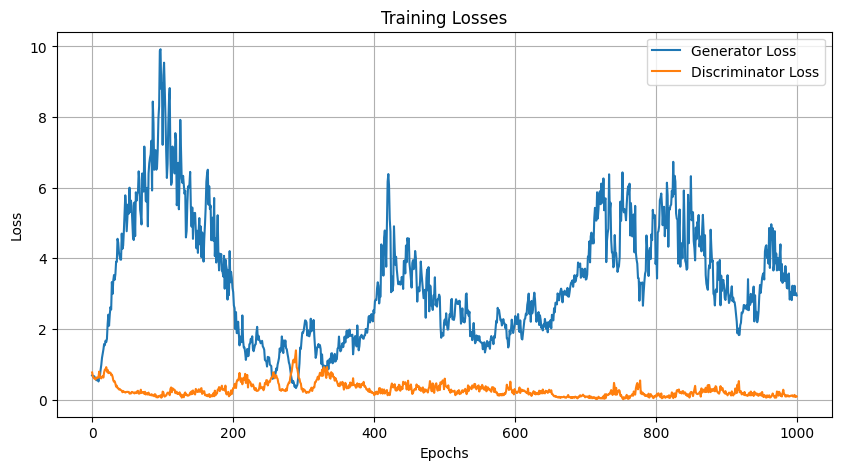

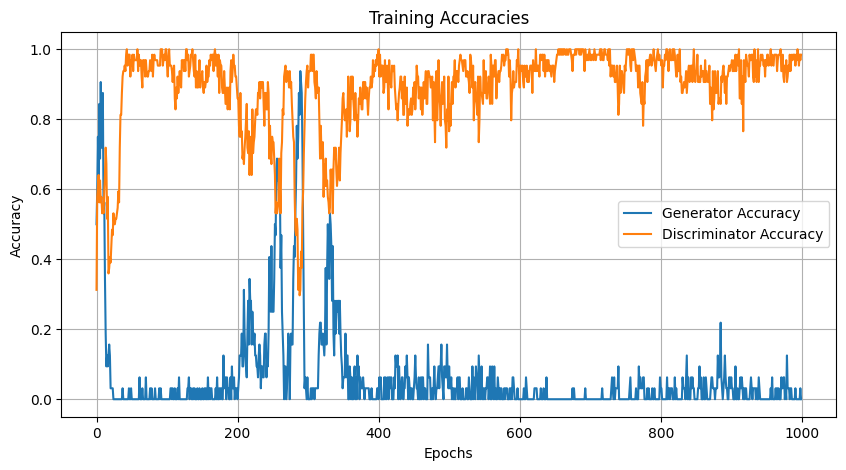

In [25]:
import matplotlib.pyplot as plt

def plot_training_metrics(generator_losses, generator_accuracies, discriminator_losses, discriminator_accuracies):
    epochs = range(len(generator_losses))

    # Plot for losses
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, generator_losses, label='Generator Loss')
    plt.plot(epochs, discriminator_losses, label='Discriminator Loss')
    plt.title('Training Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, generator_accuracies, label='Generator Accuracy')
    plt.plot(epochs, discriminator_accuracies, label='Discriminator Accuracy')
    plt.title('Training Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_training_metrics(gen_losses, gen_accs, disc_losses, disc_accs)


In [23]:
# Load the models without their compile configurations
generator = load_model('generator.tf')
discriminator = load_model('discriminator.tf')

In [24]:
# Manually compile the discriminator for further training or evaluation
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
def generate_valid_data(generator, seed_size, num_samples, real_data_min, real_data_max, tolerance=0.05):
    # Apply tolerance
    min_bounds = real_data_min - (np.abs(real_data_min) * tolerance)
    max_bounds = real_data_max + (np.abs(real_data_max) * tolerance)

    valid_generated_data = np.empty((0, real_data_min.size))
    while valid_generated_data.shape[0] < num_samples:
        remaining_samples = num_samples - valid_generated_data.shape[0]
        random_noise = np.random.normal(0, 1, size=(remaining_samples, seed_size))
        new_generated_data = generator.predict(random_noise)

        valid_mask = np.all((new_generated_data >= min_bounds) & (new_generated_data <= max_bounds), axis=1)
        valid_data = new_generated_data[valid_mask]
        valid_generated_data = np.vstack([valid_generated_data, valid_data])

        print(f"Generated {new_generated_data.shape[0]} records, accepted {valid_data.shape[0]} records.")

    return valid_generated_data[:num_samples]


In [35]:
# Usage of the function:
# Define min and max from real data (could be calculated or predefined)
#tolerance = 0.5  # 10% tolerance
#real_data_min = min_values *(1 - tolerance)
#real_data_max = max_values *(1 - tolerance)


# Define the number of samples to generate and the seed size
#num_samples = 15000
#seed_size = 100  # This should match the input size of your generator

# Assuming 'generator' is already trained and available
#generated_data = generate_valid_data(generator, seed_size, num_samples, real_data_min, real_data_max)



### Generate Random Noise

# Define the number of samples you want to generate
num_samples = 15000

# Define the dimensionality of the random noise (seed size)
seed_size = 100  # This should match the input size of your generator

# Generate random noise as input for the generator
random_noise = np.random.normal(0, 1, size=(num_samples, seed_size))

### Use the Generator to Create New Data

# Assuming `generator` is your loaded or trained generator model
generated_data = generator.predict(random_noise)

469/469 [==============================] - 0s 527us/step


In [42]:
### Step 3: Post-process the Generated Data (if necessary)

# used MinMaxScaler to scale your original data to [0, 1]
generated_data_unscaled = scaler.inverse_transform(generated_data)

# Convert the generated data to a DataFrame with the same column names as the original data
generated_df = pd.DataFrame(generated_data_unscaled, columns=data.columns)

# Apply winsorization based on the original min/max values
winsorized_data = np.clip(generated_df, min_values, max_values)


#for column, le in label_encoders.items():
#    generated_data_unscaled[column] = le.inverse_transform(generated_data_unscaled[column].astype(int))

In [43]:
# Function to apply: round and convert to int, except for non-integer columns
def process_columns(x):
    if x.name not in non_integer_columns:
        return x.round().astype(int)
    return x

In [48]:
# Apply the function across the DataFrame
rounded_df = winsorized_data.apply(process_columns)

In [49]:
rounded_df.head() #= rounded_df.drop('ind', axis=1)

,sex,age_sim,lv_educ,empl_stat,marit_stat,house_memb,chil_u_18_y,nation,religion,soc_econ_stat,...,bk_acc,ins_prop,ins_life,ins_casco,health_ins,overdraft,cons_cred,mortgage,car_leas,pens_ins
0,1,39,3,2,1,2,0,1,2,0,...,1,0,0,0,0,0,0,0,0,0
1,1,43,4,3,1,2,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0
2,1,40,4,3,1,2,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0
3,1,44,3,3,2,2,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0
4,1,41,4,3,1,2,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.cluster import KMeans

def cluster_data(data, n_clusters=3):
    """
    Applies K-means clustering to the given dataset.

    Args:
    - data (pandas.DataFrame): Dataset to cluster.
    - n_clusters (int): Number of clusters to use.

    Returns:
    - labels (numpy.array): Cluster labels for each row in the dataset.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    data['Cluster'] = clusters
    return data, clusters, labels

# Assuming real_data and generated_data are your datasets
real_data, real_clusters = add_cluster_labels(real_data, num_clusters=3)
generated_data, generated_clusters = add_cluster_labels(generated_data, num_clusters=3)


In [54]:
# Assuming `real_data` and `generated_data` are pandas DataFrames
real_labels = cluster_data(data)
generated_labels = cluster_data(rounded_df)

In [57]:
from sklearn.metrics import silhouette_score

def analyze_clusters(real_data, generated_data, real_labels, generated_labels):
    # Calculate Silhouette Scores for real and generated data
    silhouette_real = silhouette_score(real_data, real_labels)
    silhouette_generated = silhouette_score(generated_data, generated_labels)

    print(f"Silhouette Score for Real Data: {silhouette_real}")
    print(f"Silhouette Score for Generated Data: {silhouette_generated}")

    # Analyze cluster distribution
    real_cluster_counts = real_data['Cluster'].value_counts().sort_index()
    generated_cluster_counts = generated_data['Cluster'].value_counts().sort_index()

    # Calculate and display relative differences in cluster counts
    cluster_comparison = pd.DataFrame({
        'Real': real_cluster_counts,
        'Generated': generated_cluster_counts,
        'Difference (%)': ((generated_cluster_counts - real_cluster_counts) / real_cluster_counts * 100).round(2)
    })
    print("Cluster Count Comparison:\n", cluster_comparison)

    # Detailed statistical comparison for each cluster
    for cluster in range(max(real_labels) + 1):
        print(f"\n--- Cluster {cluster} ---")
        real_cluster_data = real_data[real_data['Cluster'] == cluster].describe()
        generated_cluster_data = generated_data[generated_data['Cluster'] == cluster].describe()
        
        # Calculate percentage differences for mean values
        comparison = pd.DataFrame({
            'Real Mean': real_cluster_data.loc['mean'],
            'Generated Mean': generated_cluster_data.loc['mean'],
            'Difference (%)': ((generated_cluster_data.loc['mean'] - real_cluster_data.loc['mean']) / real_cluster_data.loc['mean'] * 100).round(2)
        })
        print("Mean Value Comparison:\n", comparison)



In [58]:
analyze_clusters(data, rounded_df, real_labels, generated_labels)

Silhouette Score for Real Data: 0.7551915425929893
Silhouette Score for Generated Data: 0.5539153615268803


KeyError: 'Cluster'

In [50]:
# Save the DataFrame to a CSV file
rounded_df.to_csv('generated_data.csv', index=False)

# The 'index=False' parameter is used to prevent pandas from writing row indices into the CSV file.

In [51]:
def plot_feature_distributions(real_data, generated_data, feature_names):
    fig, axes = plt.subplots(nrows=len(feature_names), ncols=2, figsize=(12, 2 * len(feature_names)))

    for i, feature_name in enumerate(feature_names):
        # Check if the feature should be treated as categorical
        unique_values_real = real_data[feature_name].nunique()
        unique_values_generated = generated_data[feature_name].nunique()

        if unique_values_real <= 10 and unique_values_generated <= 20:
            # Convert to categorical type if not already
            real_data[feature_name] = pd.Categorical(real_data[feature_name])
            generated_data[feature_name] = pd.Categorical(generated_data[feature_name])

            # Real data bar plot
            ax = axes[i, 0]
            real_data[feature_name].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', alpha=0.7)
            ax.set_title(f'Real Data - {feature_name}')
            ax.legend([f'Real - {feature_name}'])

            # Generated data bar plot
            ax = axes[i, 1]
            generated_data[feature_name].value_counts().sort_index().plot(kind='bar', ax=ax, color='green', alpha=0.7)
            ax.set_title(f'Generated Data - {feature_name}')
            ax.legend([f'Generated - {feature_name}'])
        
        else:
            # Real data histogram
            ax = axes[i, 0]
            ax.hist(real_data[feature_name], bins=30, color='blue', alpha=0.7)
            ax.set_title(f'Real Data - {feature_name}')
            ax.legend([f'Real - {feature_name}'])

            # Generated data histogram
            ax = axes[i, 1]
            ax.hist(generated_data[feature_name], bins=30, color='green', alpha=0.7)
            ax.set_title(f'Generated Data - {feature_name}')
            ax.legend([f'Generated - {feature_name}'])

    plt.tight_layout()
    plt.show()


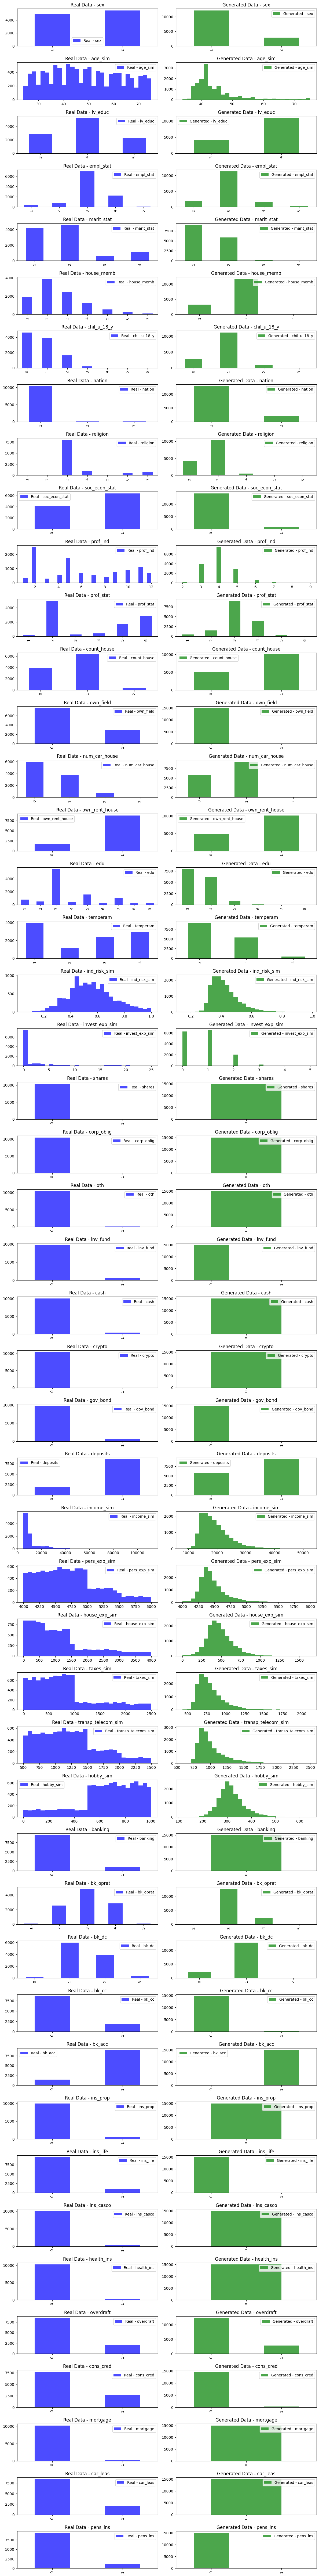

In [52]:
# Example usage, assuming data dimensions are compatible and feature_names are provided
plot_feature_distributions(
    real_data=data, 
    generated_data=rounded_df, 
    feature_names=data.columns
)